In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

from pathlib import Path

2023-11-27 13:43:32.873849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load data
data1 = pd.read_csv(Path.cwd() / '..' / 'data' / '22_12_29_ga.csv')
data2 = pd.read_pickle(Path.cwd() / '..' / 'data' / '22_12_29_gains.pkl')
errors = pickle.load(open(Path.cwd() / '..' / 'data' / 'df_errors.pkl', 'rb'))

In [3]:
# add the Fitness column to the gains dataframe
data2['Fitness'] = data1['Fitness']

minus_err = errors["Minus_Errs"].values
plus_err = errors["Plus_Errs"].values
X = data2.drop(['Fitness'], axis=1).values
y = data2['Fitness'].values
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,2211,2212,2213,2214,2215,2216,2217,2218,2219,Fitness
0,-78.92250,-20.20142,-14.20832,-10.72818,-8.287613,-6.425362,-4.936625,-3.712855,-2.689946,-1.827229,...,2.710684,3.200076,3.317596,2.845784,1.675963,-0.331046,-3.557913,-9.398011,-42.80971,5.20443
1,-72.21149,-20.24448,-14.24718,-10.75049,-8.285447,-6.392445,-4.868047,-3.605082,-2.540888,-1.636278,...,5.882415,6.369466,6.209387,5.597448,4.455757,2.548634,-0.590530,-6.430088,-46.05953,5.28597
2,-70.43326,-19.69371,-13.70804,-10.22852,-7.786266,-5.920996,-4.428332,-3.199993,-2.172092,-1.304153,...,5.217521,5.819272,5.802389,5.146962,3.821076,1.699744,-1.612868,-7.560116,-45.14138,5.11788
3,-99.54229,-20.43990,-14.43266,-10.93338,-8.467863,-6.575438,-5.052306,-3.791124,-2.729137,-1.827089,...,3.741359,3.691850,3.117771,2.661602,2.007964,0.573368,-2.223904,-7.819453,-49.03512,5.15964
4,-86.00756,-21.01388,-14.96708,-11.40168,-8.846874,-6.845640,-5.198454,-3.802742,-2.600839,-1.558722,...,-14.112510,-3.101032,-0.429442,-2.885479,-9.907563,-14.552930,-12.666010,-15.974490,-41.49732,4.61805


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
x_train_minus_errs, x_test_minus_errs, x_train_plus_errs, x_test_plus_errs= train_test_split(minus_err, plus_err, test_size=0.20, random_state=43)

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(2220,)))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# evaluate model with standardized dataset
#estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=1)

regressor = baseline_model()

regressor.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = regressor.fit(X_train, y_train, epochs=250, batch_size=16, 
                        validation_data=(X_test, y_test))

y_pred = regressor.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print(mse)

Epoch 1/250
155/155 [==============================] - 1s 4ms/step - loss: 2.1627 - mse: 2.1627 - val_loss: 0.1845 - val_mse: 0.1845
Epoch 2/250
155/155 [==============================] - 0s 3ms/step - loss: 0.1399 - mse: 0.1399 - val_loss: 0.1228 - val_mse: 0.1228
Epoch 3/250
155/155 [==============================] - 0s 3ms/step - loss: 0.1110 - mse: 0.1110 - val_loss: 0.1099 - val_mse: 0.1099
Epoch 4/250
155/155 [==============================] - 0s 3ms/step - loss: 0.0913 - mse: 0.0913 - val_loss: 0.1259 - val_mse: 0.1259
Epoch 5/250
155/155 [==============================] - 0s 2ms/step - loss: 0.0806 - mse: 0.0806 - val_loss: 0.0693 - val_mse: 0.0693
Epoch 6/250
155/155 [==============================] - 0s 2ms/step - loss: 0.0667 - mse: 0.0667 - val_loss: 0.1397 - val_mse: 0.1397
Epoch 7/250
155/155 [==============================] - 0s 2ms/step - loss: 0.1894 - mse: 0.1894 - val_loss: 0.1347 - val_mse: 0.1347
Epoch 8/250
155/155 [==============================] - 0s 2ms/step - 

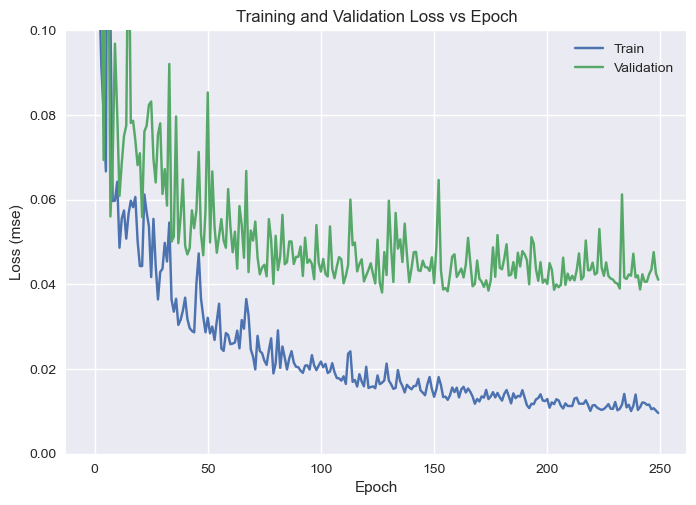

In [20]:

# print the training loss, validation loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, .1)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.title('Training and Validation Loss vs Epoch')
plt.show()


Mean squared error: 0.04402


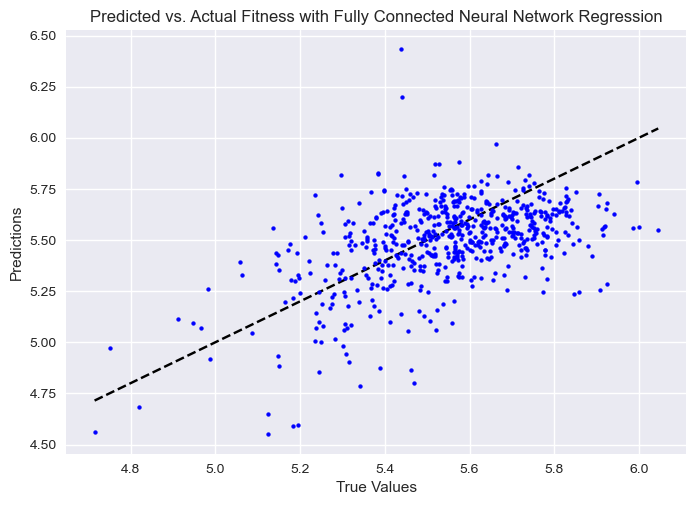

In [16]:
#print the mean squared error
print("Mean squared error: %.5f" % mse)
# set style to seaborn
plt.style.use('seaborn')
plt.scatter(y_test, y_pred, s=30, c='b', marker='.', zorder=10)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Fully Connected Neural Network Regression')
plt.show()

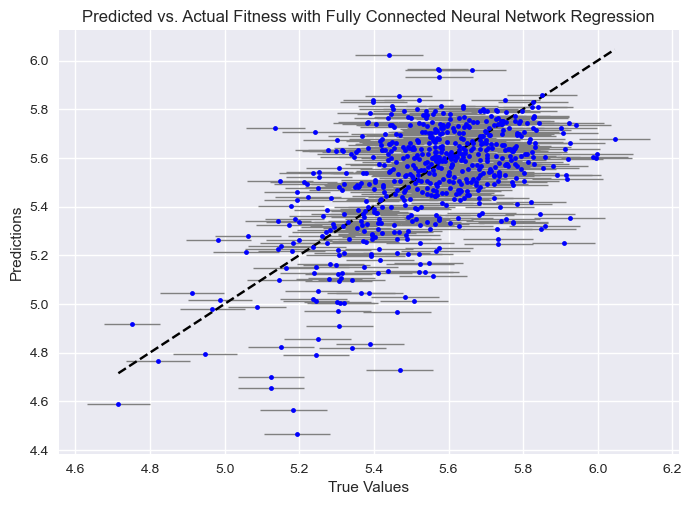

In [22]:
# set style to seaborn
plt.style.use('seaborn')
plt.errorbar(y_test, y_pred, xerr=[x_test_minus_errs, x_test_plus_errs], fmt='.', color='b',
                ecolor='gray', elinewidth=1, capsize=0.8)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Fully Connected Neural Network Regression')
plt.show()

In [23]:
# calculate the percentage of the predicted data that is within the error bars
total_in = 0
for i in range(len(y_test)):
    if y_test[i] - x_test_minus_errs[i] <= y_pred[i] <= y_test[i] + x_test_plus_errs[i]:
        total_in += 1
print("Percentage of predicted data within error bars: %.2f" % (total_in / len(y_test) * 100))

Percentage of predicted data within error bars: 36.13
